# MGL and RAM Modeling Comparison

64060
Shot Number: 64060    Count: 2


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


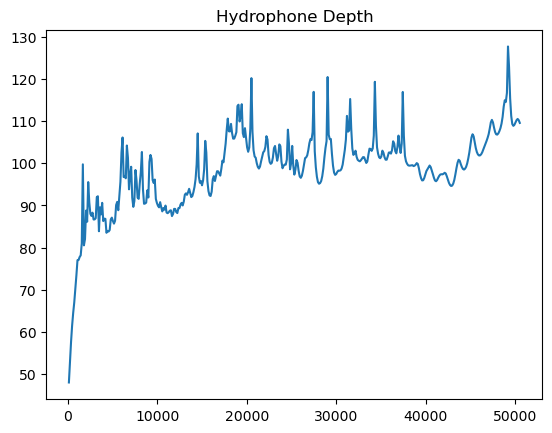

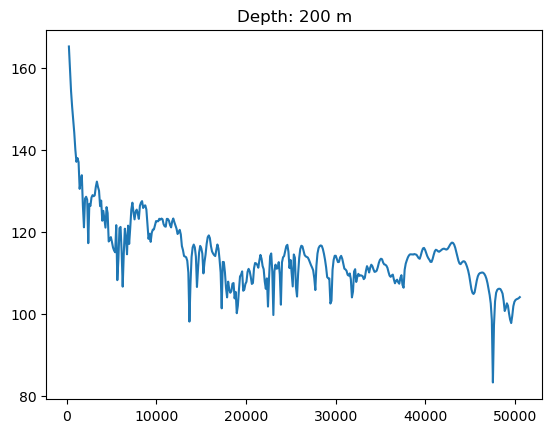

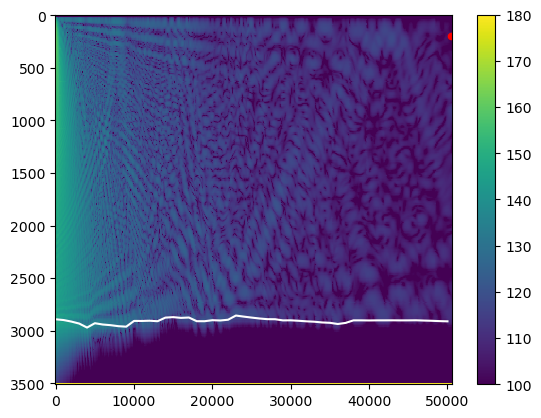

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


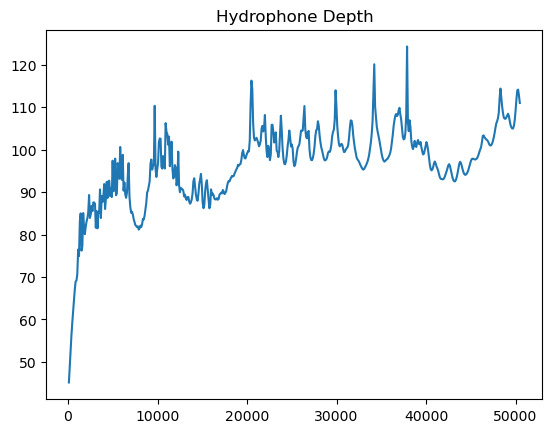

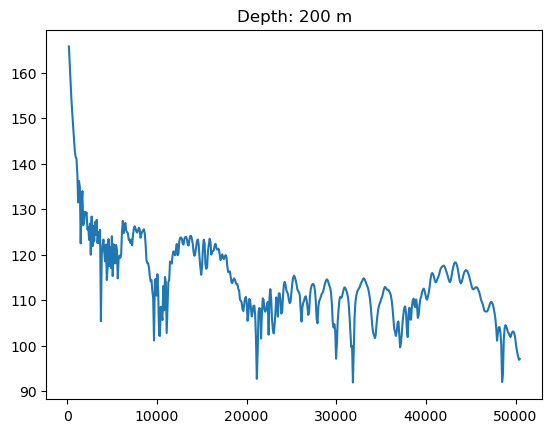

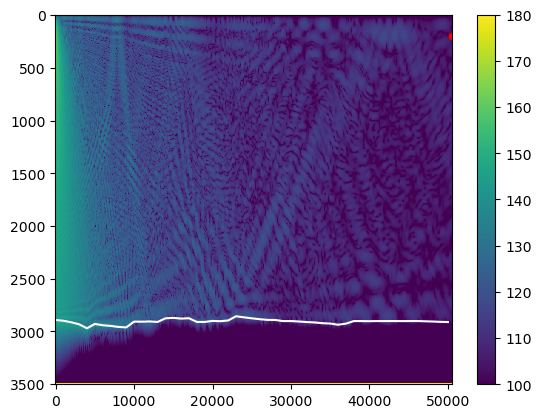

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


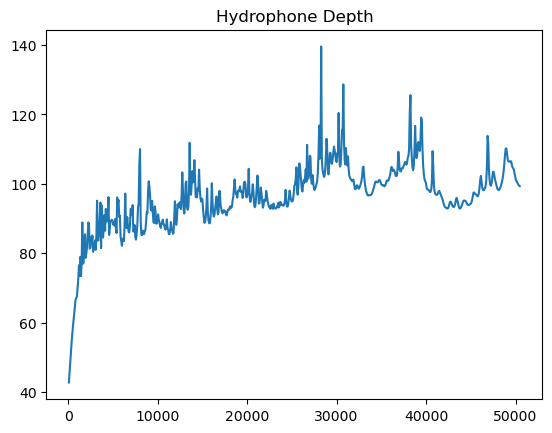

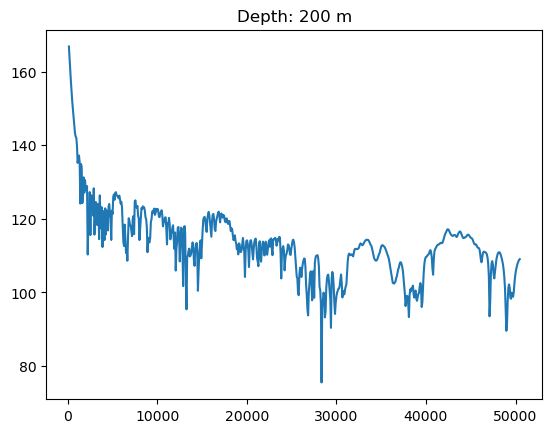

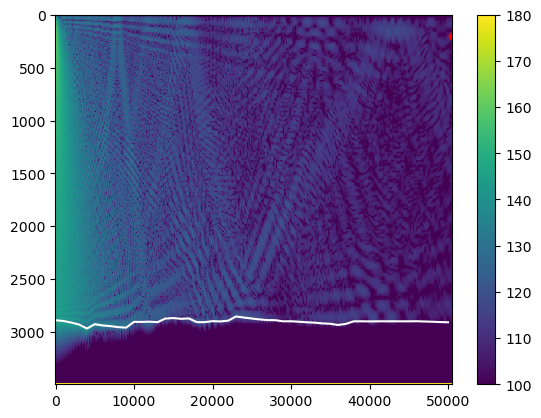

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


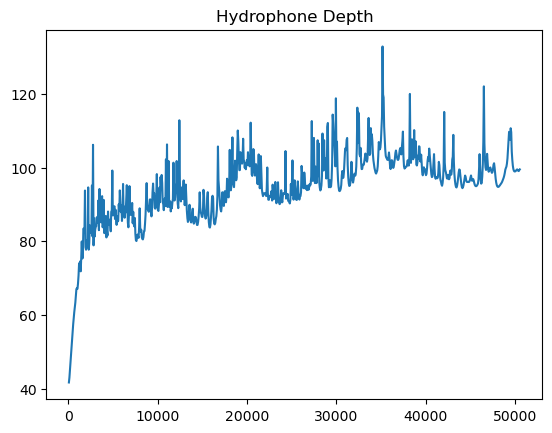

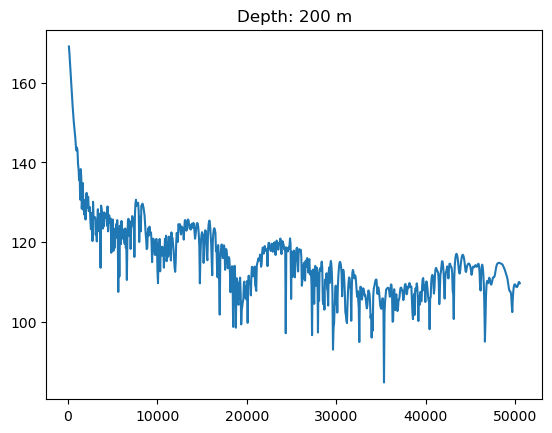

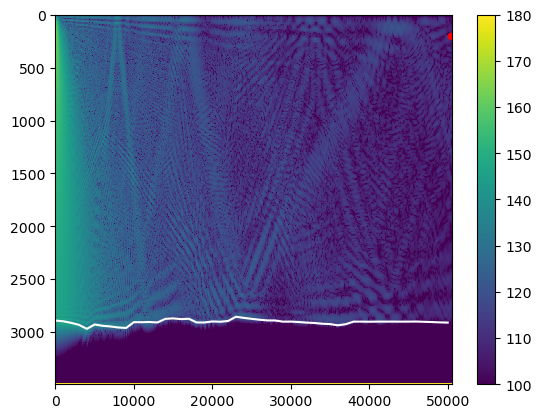

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


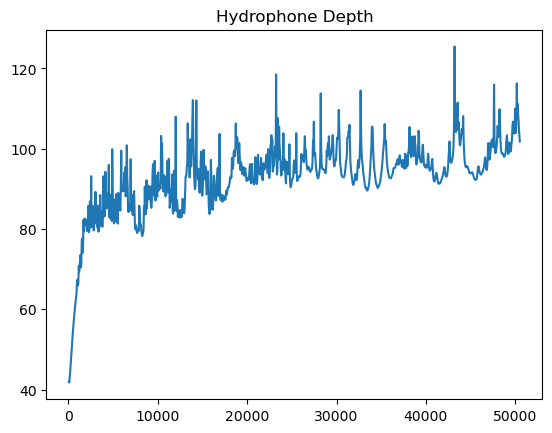

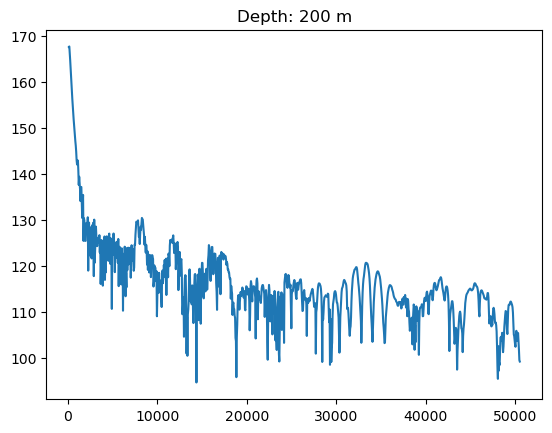

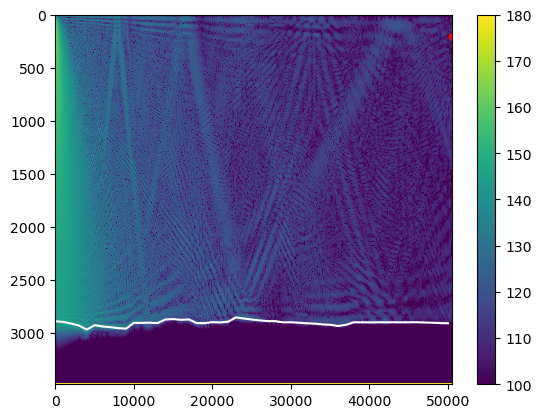

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


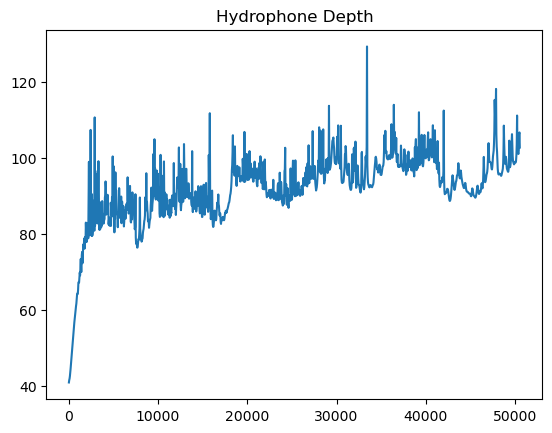

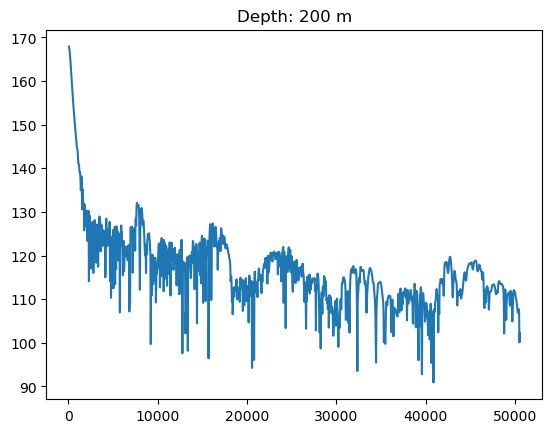

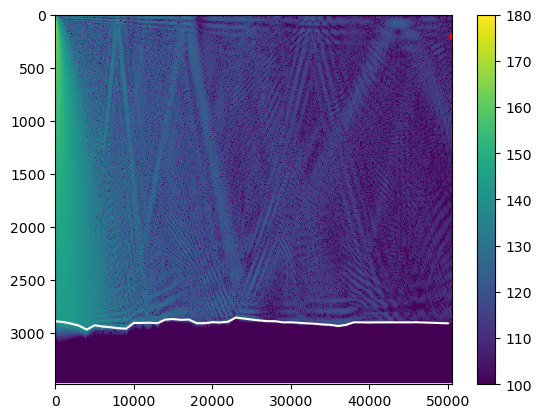

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


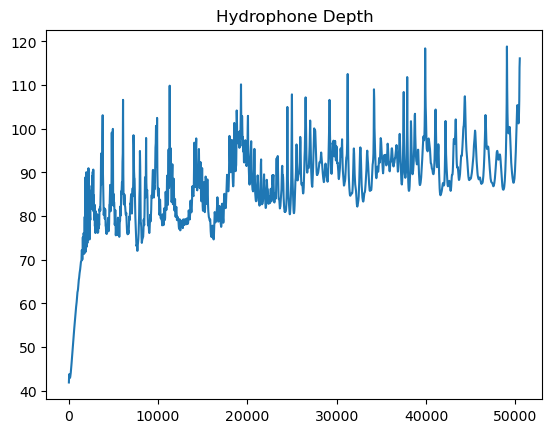

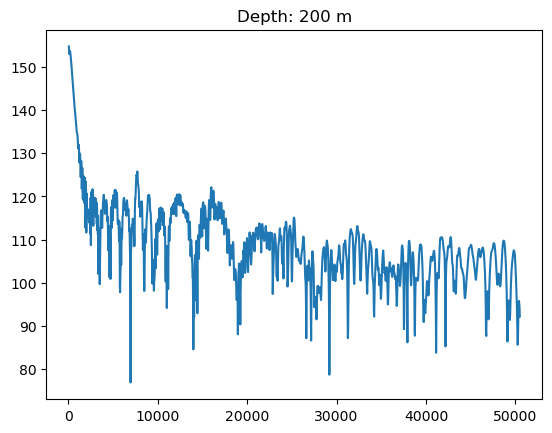

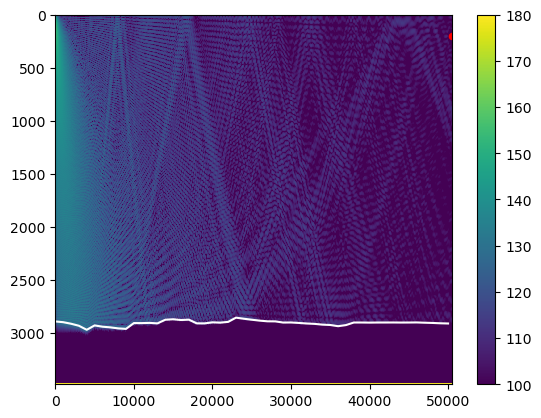

In [7]:

import numpy as np
from matplotlib import pyplot as plt
import sys
import os
import binascii
import struct
from scipy import signal
from scipy import io as spio
from Shot_Class_Low import *
from geopy import distance
# from mpl_interactions import ioff, panhandler, zoom_factory
import matplotlib.pyplot as plt
import utm
from scipy.stats import linregress
import pandas as pd
import subprocess
from csv import writer
from IPython.display import clear_output
import ooipy


ci = complex(0,1)

import warnings
warnings.filterwarnings("ignore")

lineplot = True
gridplot = True
gridflag = True
noiseflag = False
lowflag = False

test = True

# One third octave bands
third_center = [12.5, 16, 20, 25,31.5, 40,  50]#,  63,  80, 100]#,125,160,200] #,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000,10000,12500,16000,20000]
third_BW     = [ 2.9,3.7,4.6,5.8, 7.3,9.2,11.5]#,14.6,18.3,22.9]#, 29, 37, 36] #, 58, 73, 92,115,146,183, 231, 291, 365, 461, 579, 730, 919,1156,1456,1834, 2307, 2910, 3650, 4610]
# third_center = [12.5, 16, 20, 25,31.5, 40, 50, 63, 80,100]#,125,160,200] #,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000,10000,12500,16000,20000]
# third_BW     = [ 2.9,3.7,4.6,5.8, 7.3,9.2,1.0,1.0,1.0,1.0]#, 29, 37, 36] #, 58, 73, 92,115,146,183, 231, 291, 365, 461, 579, 730, 919,1156,1456,1834, 2307, 2910, 3650, 4610]

# Define Cruise Stuff
cruise = 'MGL2104'
year = '2021'
hyd_num = 3
csvfile = cruise+'_hyd'+str(hyd_num)+'_20240816.csv'
path = 'Insync/asd21@uw.edu/Google Drive/Git/seismic/'

if cruise == 'MGL1905':    
    shot_range = 86000
    year = '2019'
elif cruise == 'MGL2104':
    shot_range = 135000
    year = '2021'

# Input params
sens = 0.002239 # Broadband hydrophones
sens_low = 0.0005011 # Low frequency hydrophones
pref = 1e-6
sd = 12
ssp = pd.read_csv('MGL1905_SSP.csv')
# ssp = pd.read_csv(cruise + '_SSP.csv')
TL_d2 = 200

SSPdates = np.load(cruise + '_SSP_Dates.npz',allow_pickle=True)['arr_0']
SSPs = np.load(cruise + '_SSP_Shallow.npz',allow_pickle=True)['arr_0']

shot_flag = 'defined'
shot_numbers = [64060] #np.arange(2560,5000,2)


Airguns = spio.loadmat('Langseth_12m_9Guns.mat')
srcN = 36
srcV = [360, 360, 40, 180, 90, 120, 60, 220, 220, 360, 360, 40, 180, 90, 120, 60, 220, 220, 360, 360, 40, 180, 90, 120, 60, 220, 220, 360, 360, 40, 180, 90, 120, 60, 220, 220]
srcZ = [12.55, 11.8, 11.8, 12, 12, 12, 12, 12.55, 11.8, 12.55, 11.8, 11.8, 12, 12, 12, 12, 12.55, 11.8, 12.55, 11.8, 11.8, 12, 12, 12, 12, 12.55, 11.8, 12.55, 11.8, 11.8, 12, 12, 12, 12, 12.55, 11.8]
srcX = [-8, -8, -4.77, -2.41, 0.23, 2.69, 5, 8, 8, -8, -8, -4.77, -2.41, 0.23, 2.69, 5, 8, 8, -8, -8, -4.77, -2.41, 0.23, 2.69, 5, 8, 8, -8, -8, -4.77, -2.41, 0.23, 2.69, 5, 8, 8]
srcY = [12, 12, 12, 12, 12, 12, 12, 12, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -12, -12, -12, -12, -12, -12, -12, -12, -12]


count = 0

SPLmaxcount = []
SPLmincount = []
SPLmedcount = []
SPLmeancount = []
SELcount = []
TLcount = []
r_count = []
d_count = []
shot_count = []
        
    
# Create Excel Sheet and write Results

if not os.path.isfile(csvfile):
    with open(csvfile, 'a') as f_object:

        header_list = ['Shot Number','Line','Shot Range (m)','Shot Point Depth (m)','Mean Bath (m)','Median Bath (m)','Min Bath (m)','Max Bath (m)',
                      'Bath Slope (m/km)','StDev Bath (m)','Shot Volume (in3)','Shot Heading']
        
        
        for f_temp in third_center:
            header_list.append('RAM ' + str(f_temp) + ' Hz')
            header_list.append('SEL ' + str(f_temp) + ' Hz')
            header_list.append('SPLmax ' + str(f_temp) + ' Hz')
            header_list.append('SPLmin ' + str(f_temp) + ' Hz')
            header_list.append('SPLmed ' + str(f_temp) + ' Hz')
            header_list.append('SPLmean ' + str(f_temp) + ' Hz')
            header_list.append('SELerr ' + str(f_temp) + ' Hz')
            header_list.append('SPLmaxerr ' + str(f_temp) + ' Hz')
            header_list.append('SPLmeanerr ' + str(f_temp) + ' Hz')
            
            if noiseflag == True:
                header_list.append('SEL_noise ' + str(f_temp) + ' Hz')
                header_list.append('SPLmax_noise ' + str(f_temp) + ' Hz')
                header_list.append('SPLmin_noise ' + str(f_temp) + ' Hz')
                header_list.append('SPLmed_noise ' + str(f_temp) + ' Hz')
                header_list.append('SPLmean_noise ' + str(f_temp) + ' Hz')
                header_list.append('SELerr_noise ' + str(f_temp) + ' Hz')
                header_list.append('SPLmaxerr_noise ' + str(f_temp) + ' Hz')
                header_list.append('SPLmeanerr_noise ' + str(f_temp) + ' Hz')
                
            if lowflag == True:
                header_list.append('SEL_low ' + str(f_temp) + ' Hz')
                header_list.append('SPLmax_low ' + str(f_temp) + ' Hz')
                header_list.append('SPLmin_low ' + str(f_temp) + ' Hz')
                header_list.append('SPLmed_low ' + str(f_temp) + ' Hz')
                header_list.append('SPLmean_low ' + str(f_temp) + ' Hz')
                header_list.append('SELerr_low ' + str(f_temp) + ' Hz')
                header_list.append('SPLmaxerr_low ' + str(f_temp) + ' Hz')
                header_list.append('SPLmeanerr_low ' + str(f_temp) + ' Hz')

        writer_object = writer(f_object)
        writer_object.writerow(header_list)
        writer_object.writerow(header_list)
        
        f_object.close()
    

# while count < 10000:
for shot_number in shot_numbers:
    count += 1
    
    shot_number = int(shot_number)

    csv_row = []

#     if shot_flag == 'Random' or shot_flag == 'random' or shot_flag == 'RANDOM':
#         shot_number = int(np.random.random()*shot_range)
        
#         while shot_number < 75000:
#             shot_number = int(np.random.random()*shot_range)

    csv_row.append(shot_number)

    print(shot_number)
    # Select a shot
    # shot_number = 3688

    try:
    # tmp = True
    # if tmp == True:

        tmp = OOIshot(cruise,shot_number,hyd_num,True,False)


        ### GET DATA ###

        tmp2 = tmp.OOI_data[tmp.hydrophones[hyd_num][8:]]
        SP = tmp2['SP']
        LineNum = tmp2['line']
        nperseg = int(tmp2['Sampling Rate']*0.1)
        noverlap = int(nperseg*0.9)
        fs = tmp2['Sampling Rate']
        shot_bath = tmp2['Water Depth']-1
        rd = tmp.hydrophone_data[tmp.hydrophones[hyd_num][8:]]['Depth (m)']
        if rd > 500:
            rd -= 5
        rr = tmp2['Shot Range']
        src_ang = tmp2['Direction (deg)']
        d_ang = np.arctan(shot_bath/rr)*180/np.pi
        # print(rr)
        # dr = 500
        npade = 8
        cb = 1700
        rhob = 2
        if hyd_num == 0:
            attnb = [0.0539,10.0]
        if hyd_num == 1:
            attnb = [0.0539,10.0]
        if hyd_num == 2:
            attnb = [0.0734,10.0]
        if hyd_num == 3:
            attnb = [0.0734,10.0]

        csv_row.append(LineNum)
        csv_row.append(rr)
        csv_row.append(shot_bath)

#         # print(rr)

        if lowflag == True:
        
            try:
                tmpDT = datetime.datetime.strptime(year[2:]+str(tmp2['day']), '%y%j').date()
                low_start_time = datetime.datetime(tmpDT.year,tmpDT.month,tmpDT.day,int(tmp2['time'][0:2]),int(tmp2['time'][3:5]),int(tmp2['time'][6:8]))
                low_end_time = datetime.datetime(tmpDT.year,tmpDT.month,tmpDT.day,int(tmp2['time'][0:2]),int(tmp2['time'][3:5])+1,int(tmp2['time'][6:8]))

                if hyd_num == 0:
                    hdata_lowfreq = ooipy.get_acoustic_data_LF(low_start_time, low_end_time, 'Axial_Base', verbose=True, zero_mean=True)  
                    da = xr.DataArray(data = hdata_lowfreq.data)              

                elif hyd_num == 2:
                    hdata_lowfreq = ooipy.get_acoustic_data_LF(low_start_time, low_end_time, 'Slope_Base', verbose=True, zero_mean=True)
                    da = xr.DataArray(data = hdata_lowfreq.data)   
            except:
                print('No LF data')
                lowflag = False


        # SSP Stuff
        day = datetime.datetime.strptime(str(tmp2['day']), '%j').date().day
        month = datetime.datetime.strptime(str(tmp2['day']), '%j').date().month
        tmpDate = datetime.datetime(int(year),month,day,0,0)

        if cruise == 'MGL1905':
            try:
                SSP_i = np.where(SSPdates == tmpDate)[0][0]
                SSPshallow = SSPs[SSP_i]

                for ii in range(180):
                    if ~np.isnan(SSPshallow[ii]):
                        ssp['Sound Speed (m/s)'][ii] = SSPshallow[ii]
            except:
                print('No SSP Adjustment')

        if cruise == 'MGL2104':
            SSPlow = ssp['Sound Speed (m/s)'][180] 
            SSPhigh = 1500
            SSPold = ssp['Sound Speed (m/s)'][0]
            for ii in range(180):
                newSPD = (ssp['Sound Speed (m/s)'][ii]-SSPlow)/(SSPold-SSPlow) * (SSPhigh-SSPlow) + SSPlow
                ssp['Sound Speed (m/s)'][ii] = newSPD


        ### Source Model
        SRCSIG = np.zeros(len(Airguns['p_notional'][0]),dtype=complex)
        f_airgun = np.linspace(0,500,len(SRCSIG))
        for ai,airgun in enumerate(Airguns['p_notional']):
            dRx = srcX[ai]*np.cos(src_ang/180*np.pi)*np.cos(d_ang/180*np.pi)
            dRy = srcY[ai]*np.sin(src_ang/180*np.pi)*np.cos(d_ang/180*np.pi)
            dR = np.sqrt(dRx**2 + dRy**2)
            dt = dR/ssp['Sound Speed (m/s)'][12]

            SRCSIG += np.fft.fft(airgun)*np.exp(-ci*2*np.pi*f_airgun*dt)

        srcSig = np.fft.ifft(SRCSIG)
        srcSig = signal.resample(srcSig,500)
        SRCSIG = np.fft.fft(srcSig)*(int(tmp2['volume']))**(1/3)/(6600**(1/3))


        ### GET BATHYMETRY ###
        bath = tmp2['Bathymetry']
        # bath = 2000*np.ones(len(bath))
        r_bath = np.arange(0,100*len(bath),100)
        #r_interp = np.arange(0,rr+dr,dr)
        r_interp = np.linspace(0,rr,2000)
        bath = np.interp(r_interp,r_bath,bath)

        zmplt0 = np.max(bath)+500

    #     plt.plot(r_interp,-bath)
    #     plt.show()


        ### GET SPL AND SEL ###

        # Estimate SPL and SEL
        T = 1/fs
        dtime = 18
        SPLtime = 1 # Size of SPL window in seconds
        SPLshift = 0.5 # Fraction of SPL Window
        t = tmp2['t'][0:int(fs*dtime)]

        bath_slope = (bath[-1] - bath[0])/rr

        csv_row.append(np.mean(bath))
        csv_row.append(np.median(bath))
        csv_row.append(np.min(bath))
        csv_row.append(np.max(bath))
        csv_row.append(bath_slope)
        csv_row.append(np.std(bath))
        csv_row.append(tmp2['volume'])
        csv_row.append(tmp2['Direction (deg)'])

        count += 1

        print('Shot Number: ' + str(shot_number) + '    Count: ' + str(count))

    except:
        continue 

        # print('No Data')

    # Construct source signal
    
    # Find Noise Reference and redo calcs!
    if cruise == 'MGL1905':
        if hyd_num == 0:
            NoiseFile = 'MGL1905_AxialBaseSeafloor/OOI_Metrics_MGL1905_ABSF_SPLs_noiseBA.npz'

        else:
            print('Wrong Hydrophone!')

    if cruise == 'MGL2104':
        if hyd_num == 0:
            print('Wrong Hydrophone!')

        elif hyd_num == 1:
            NoiseFile = 'MGL2104_AxialBaseShallow/OOI_Metrics_MGL2104_ABSH_SPLs_noiseBA.npz'

        elif hyd_num == 2:
            NoiseFile = 'MGL2104_OregonSlopeSeafloor/OOI_Metrics_MGL2104_OSSF_SPLs_noiseBA.npz'

        elif hyd_num == 3:
            NoiseFile = 'MGL2104_OregonSlopeShallow/OOI_Metrics_MGL2104_OSSH_SPLs_noiseBA.npz'

    noisetmp = np.load(NoiseFile)['arr_0']


    TLsave = []

    # Loop Over Frequencies
    for i,freq_third in enumerate(third_center):

    # print(freq_third)
    # for i,freq in enumerate([20]):

        try:
        # test = True
        # if test == True:
            lowF = np.round(third_center[i] - third_BW[i]/2)
            highF = np.round(third_center[i] + third_BW[i]/2)
            loop_f = np.arange(lowF,highF,1)
            
            if third_center[i] > 40:
                lowF = np.round(third_center[i])
                highF = np.round(third_center[i]+1)
                loop_f = np.arange(lowF,highF,1)
                

            SL = 10*np.log10(np.sum(np.abs(SRCSIG[int(lowF):int(highF)]/len(SRCSIG))**2)/1e-12)

            lam = 1500/freq_third
            dz = np.round(lam)/10
            if dz < 0.1:
                dz = 0.1
            # print(dz)
            zmplt = zmplt0 + zmplt0%dz

            dr = dz*10

            bath = tmp2['Bathymetry']
            # bath = 2000*np.ones(len(bath))
            r_bath = np.arange(0,100*len(bath),100)
            #r_interp = np.arange(0,rr+dr,dr)
            r_interp = np.arange(0,rr,1000)
            bath = np.interp(r_interp,r_bath,bath)

            f_low = freq_third - third_BW[i]/2
            if f_low < 1:
                f_low = 1
            f_high = freq_third + third_BW[i]/2
            if f_high >= 32000:
                f_high = 29999

            datafilt = bp_filter_OOI(tmp2['data'],order=4,frequencies=[f_low,f_high],fs=fs)
            if np.isnan(datafilt[0]):
                datafilt = bp_filter_OOI(tmp2['data'],order=3,frequencies=[f_low,f_high],fs=fs)
            if np.isnan(datafilt[0]):
                datafilt = bp_filter_OOI(tmp2['data'],order=2,frequencies=[f_low,f_high],fs=fs)


            SELdata = tmp2['data']
            SELdata = SELdata[0:int(fs*dtime)]
            SELDATA = np.fft.fft(SELdata)
            # print('FFT Complete')
            f0 = int(f_low/fs*len(SELDATA))
            f1 = int(f_high/fs*len(SELDATA))
            if f0 == f1:
                f1 = f0 + 1
            # print('f0 f1')

            SPL, t_win, SPLdict = SPL_calc(datafilt,fs,SPLtime=SPLtime,SPLshift=SPLshift,pref=pref,sens=sens)
            
            # print('SPL Complete')

            #SEL = SEL_calc(datafilt,0,dtime,fs=fs,sens=sens)
            SEL = 10*np.log10(np.sum( (np.abs(SELDATA)[f0:f1]*sens/pref/len(SELDATA))**2 ))
            # print('SEL Complete')

            ### Peak SPL from shot
            SPLmax  = np.max(SPL)
            SPLmed  = np.median(SPL)
            SPLmean = np.mean(SPL)
            SPLmin  = np.min(SPL)
            
            
            if noiseflag == True:
            
                SPLmax_noise = 20*np.log10( (10**(SPLmax/20) - 10**(noisetmp[0,i]/20-61.2/20) ) )
                SPLmin_noise = 20*np.log10( (10**(SPLmin/20) - 10**(noisetmp[0,i]/20-61.2/20) ) )
                SPLmed_noise = 20*np.log10( (10**(SPLmed/20) - 10**(noisetmp[0,i]/20-61.2/20) ) )
                SPLmean_noise = 20*np.log10( (10**(SPLmean/20) - 10**(noisetmp[0,i]/20-61.2/20) ) )
                SEL_noise = 20*np.log10( (10**(SEL/20) - dtime*10**(noisetmp[0,i]/20-61.2/20) ) )

            
            if lowflag == True:
                
                datafilt = bp_filter_OOI(da.data,order=4,frequencies=[f_low,f_high],fs=200)
                if np.isnan(datafilt[0]):
                    datafilt = bp_filter_OOI(da.data,order=3,frequencies=[f_low,f_high],fs=200)
                if np.isnan(datafilt[0]):
                    datafilt = bp_filter_OOI(da.data,order=2,frequencies=[f_low,f_high],fs=200)
                    
                SPL_low, t_win, SPLdict = SPL_calc(datafilt,200,SPLtime=SPLtime,SPLshift=SPLshift,pref=pref,sens=sens_low)

                # print('SPL Complete')

                SELdata = da.data
                SELdata = SELdata[0:int(fs*dtime)]
                SELDATA = np.fft.fft(SELdata)
                f0 = int(f_low/200*len(SELDATA))
                f1 = int(f_high/200*len(SELDATA))
                #SEL = SEL_calc(datafilt,0,dtime,fs=fs,sens=sens)
                SEL_low = 10*np.log10(np.sum( (np.abs(SELDATA)[f0:f1]*sens_low/pref/len(SELDATA))**2 ))
                # print('SEL Complete')

                ### Peak SPL from shot
                SPLmax_low  = np.max(SPL_low)
                SPLmed_low  = np.median(SPL_low)
                SPLmean_low = np.mean(SPL_low)
                SPLmin_low  = np.min(SPL_low)

            nrr = int(rr/dr)
            nrd = int(zmplt/dz)+2

            TLline_lin = np.zeros(nrr+1)
            TLgrid_lin = np.zeros([nrr,nrd])
            
        except:
            print('Filter failed')

        try:
        # if test == True:

            # print(loop_f)
            for freq in loop_f:

                ### CREATE RAM MODEL ###
                # filename = '/home/asd21/RAM/ram.in'
                filename = '/home/asd21/Insync/asd21@uw.edu/Google Drive/Git/seismic/ram.in'
                #os.remove(filename)

                with open(filename, 'w') as f:

                    f.write(filename)

                    f.write('\r\n')

                    # freq zs zr 
                    f.write(str(freq) + ' ' + str(sd) + ' ' + str(rd))
                    f.write('     freq zs zr')
                    f.write('\r\n')

                    # rmax dr ndr
                    f.write(str(rr) + ' ' + str(dr) + ' 1')
                    f.write('     rmax dr ndr')
                    f.write('\r\n')

                    # zmax dz ndz zmplt
                    f.write(str(np.max(bath)+1000) + ' ' + str(dz) + ' 1 ' + str(zmplt))
                    f.write('     zmax dz ndz zmplt')
                    f.write('\r\n')

                    # c0 np ns rs
                    f.write('1500.0 ' + str(npade) + ' 1 ' + ' 0.0')
                    f.write('     c0 np ns rs')
                    f.write('\r\n')

                    for pt,bath_pt in enumerate(bath):
                        # rb zb
                        f.write(str(np.round(r_interp[pt],3)) + ' ' + str(np.round(bath_pt,3)))
                        f.write('     rb zb')
                        f.write('\r\n')


                    f.write('-1 -1')

                    f.write('\r\n')

                    for ri,row in ssp.iterrows():
                        f.write(str(row['Depth (m)']) + ' ' + str(row['Sound Speed (m/s)']))
                        # f.write(str(row['Depth (m)']) + ' ' + str(1500.0))
                        f.write('     z cw')
                        f.write('\r\n')
                        
                        if int(row['Depth (m)']) == int(np.max(bath)):
                            cSED_ref = int(row['Sound Speed (m/s)'])

                    f.write('-1 -1')

                    f.write('\r\n')

                    #f.write(str(0.0) + ' ' + str(1800.0))
                    f.write(str(0.0) + ' ' + str(cSED_ref*1.15))
                    f.write('     z cb')
                    f.write('\r\n')

                    f.write('-1 -1')

                    f.write('\r\n')

                    f.write(str(0.0) + ' ' + str(1.5))
                    f.write('     z rhob')
                    f.write('\r\n')

                    f.write('-1 -1')

                    f.write('\r\n')
                    
                    if lam > 16:

                        f.write(str(0.0) + ' ' + str(attnb[0]*freq**2/1500/1000))
                        f.write('     z attn')
                        f.write('\r\n')
                        f.write(str(500.0) + ' ' + str(attnb[0]*freq**2/1500/1000))
                        f.write('     z attn')
                        f.write('\r\n')
                        f.write(str(501.0) + ' ' + str(attnb[0]*freq**2/1500/1000))
                        # f.write(str(500) + ' ' + str(attnb[0]))
                        f.write('\r\n')
                        f.write(str(30*lam) + ' ' + str(10.0))
                        # f.write(str(1500*lam) + ' ' + str(10.0))
                        f.write('\r\n')
                        
                    else:

                        f.write(str(0.0) + ' ' + str(attnb[0]*freq**2/1500/1000))
                        f.write('     z attn')
                        f.write('\r\n')
                        f.write(str(500.0) + ' ' + str(attnb[0]*freq**2/1500/1000))
                        f.write('     z attn')
                        f.write('\r\n')
                        f.write(str(501.0) + ' ' + str(attnb[0]*freq**2/1500/1000))
                        # f.write(str(500) + ' ' + str(attnb[0]))
                        f.write('\r\n')
                        f.write(str(1000.0) + ' ' + str(10.0))
                        # f.write(str(1500*lam) + ' ' + str(10.0))
                        f.write('\r\n')

                    f.write('-1 -1')

                    f.close()



                ### RUN RAM ###

                # os.system("/home/asd21/at/AcTUPv2p2L2/AcTUPv2p2L2/RAM/RAMSGeo.exe")
                out = subprocess.run("/home/asd21/Insync/asd21@uw.edu/Google Drive/Git/seismic/RAM/ram.exe");

                file = open("tl.line", "r")
                rTL = []
                TLline = []
                for line in file.readlines():
                    rTL.append(float(line.strip().split(' ')[0]))
                    TLline.append(float(line.strip().split(' ')[-1]))
                file.close()
                TLline = np.array(TLline)

                header = 17
                file = open("tl.grid", "rb")
                content = file.read()
                bts = 4
                tmpTL = []
                for ii in range(nrr*nrd+header):
                    if ii < header:
                        continue
                    tmpTL.append(struct.unpack('f',content[bts*ii:bts*(ii+1)])[0])
                TLline_lin += 10**(TLline/10)

                if gridflag == True:
                    TLgrid = np.zeros([nrr,nrd])
                    for dd in range(nrr):
                        i0 = nrd*dd
                        i1 = nrd*(dd+1)
                        TLgrid[dd,:] = tmpTL[i0:i1]
                    TLgrid_lin += 10**(TLgrid/10)


            TLline = SL - 10*np.log10(TLline_lin/len(loop_f))

            TL = TLline[-1] #np.mean(TLline[-3:])

            TLsave.append(TL)
            
            csv_row.append(TL)
            csv_row.append(SEL)
            csv_row.append(SPLmax)
            csv_row.append(SPLmed)
            csv_row.append(SPLmean)
            csv_row.append(SPLmin)
            csv_row.append(TL-SEL)
            csv_row.append(TL-SPLmax)
            csv_row.append(TL-SPLmean)
            
            
            if noiseflag == True:
                csv_row.append(SEL_noise)
                csv_row.append(SPLmax_noise)
                csv_row.append(SPLmed_noise)
                csv_row.append(SPLmean_noise)
                csv_row.append(SPLmin_noise)
                csv_row.append(TL-SEL_noise)
                csv_row.append(TL-SPLmax_noise)
                csv_row.append(TL-SPLmean_noise)
                
            if lowflag == True:
                csv_row.append(SEL_low)
                csv_row.append(SPLmax_low)
                csv_row.append(SPLmed_low)
                csv_row.append(SPLmean_low)
                csv_row.append(SPLmin_low)
                csv_row.append(TL-SEL_low)
                csv_row.append(TL-SPLmax_low)
                csv_row.append(TL-SPLmean_low)
            

            if gridflag == True:
                TLgrid = 10*np.log10(TLgrid_lin/len(loop_f))
                TLline2 = TLgrid[:,int(TL_d2/dz)]


            if lineplot == True:
                nrr = int(rr/dr)
                # plt.figure(figsize=(10,zmplt0/rr*50))
                plt.plot(rTL,SL-TLline)
                plt.title('Hydrophone Depth')
                # plt.gca().invert_yaxis()
                # plt.ylim([300,350])
                plt.show()

                if gridflag == True:
                    nrr = int(rr/dr)
                    # plt.figure(figsize=(10,zmplt0/rr*50))
                    plt.plot(rTL[1:],SL-TLline2)
                    plt.title('Depth: ' + str(TL_d2) + ' m')
                    # plt.gca().invert_yaxis()
                    # plt.ylim([300,350])
                    plt.show()

            if gridplot == True:

                # plt.figure(figsize=(10,zmplt0/rr*50))
                # plt.pcolor(np.arange(0,dr*nrr+dr,dr),np.arange(0,nrd*dz+dz,dz),SL-TLgrid.T,vmin = 100, vmax = 230)
                plt.pcolor(np.linspace(0,dr*nrr+dr,np.shape(TLgrid)[0]),np.linspace(0,nrd*dz+dz,np.shape(TLgrid)[1]),SL-TLgrid.T,vmin = 100, vmax = 180)
                plt.colorbar()
                plt.gca().invert_yaxis()
                plt.plot(r_interp,bath,'w')
                plt.scatter(rr,rd,s=20,c='r')
                plt.show()

        except:
            continue


    ### WRITE CSV FILE ###
    with open(csvfile, 'a') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(csv_row)

        f_object.close()


        # TLsave.append(TL/3)
    
    clear_output(wait=True)
    
    # TLcount.append(TLsave)
    # SPLmaxcount.append(SPLmaxsave)
    # SPLmincount.append(SPLminsave)
    # SPLmedcount.append(SPLmedsave)
    # SPLmeancount.append(SPLmeansave)
    # SELcount.append(SELsave)
    # r_count.append(rr)
    # d_count.append(shot_bath)
    # shot_count.append(shot_number)